## Esercitazione 8  dell'   8  Aprile 2025


## Condizionamento del problema della soluzione di un sistema lineare

# Esercizio 1
- Costruire la matrice di Vandermonde A, generata dal vettore x=[1.0,2.0,...,6.0] utilizzando la funzione np.vander(x, increasing=True) di numpy. 
- Calcolarne l'indice di condizionamento in norma infinito senza utilizzare la funzione cond di numpy.linalg e poi confrontarne il valore con quello ottenuto utilizzando la funzione.
- Considerare il sistema lineare Ax=b  con matrice dei coefficienti A e termine noto costruito in maniera tale che la soluzione esatta sia il vettore x=[1,1,1,1,1,1] (ogni sua componente è 1) e risolverlo usando il metodo solve del modulo linalg di Scipy.
- perturbare il vettore dei termini noti della quantità
- 
$$
\delta b = 0.025 \, \ast \,
\left [
\begin{array}{c}
1\\
0\\
0\\
0
\end{array}
\right ]
$$
- Risolvere il sistema con termine noto pertubato $b + \delta b$ ((usando il metodo solve del modulo linalg di Scipy).
- Calcolare l'errore relativo sul termine noto e l'errore relativo sulla soluzione. Cosa si può concludere?

N.B. per il calcolo dell'inversa della matrice di A usare la funzione di numpy.linalg.inv(A).


In [37]:
import numpy as np
import scipy as sp

x = np.arange(1.0, 7.0)
A = np.vander(x, increasing=True)
print("x:", x)
print("A:", A)

norma_inf = lambda A: np.max(np.sum(np.abs(A), axis=1))

cond = norma_inf(np.linalg.inv(A))*norma_inf(A)
cond_np = np.linalg.cond(A, np.inf)

print("Condizionamento (custom):", cond)
print("Condizionamento (numpy):", cond_np)

xx = np.full_like(x, 1.0).reshape(-1, 1)
b = A @ xx

x_ris = sp.linalg.solve(A, b)
print("b:", b)
print("Ax = b (originale):", xx)
print("Ax = b (scipy):", x_ris)

delta_b = np.zeros_like(b) + [[0.25]]
b2 = b + delta_b
x2_ris = sp.linalg.solve(A, b2)
print("b perturbato:", b2)
print("Ax = b perturbato:", x2_ris)

err_b = np.linalg.norm(b - b2, np.inf) / np.linalg.norm(b, np.inf)
err_x = np.linalg.norm(x_ris - x2_ris, np.inf) / np.linalg.norm(x_ris, np.inf)
print("Errore relativo b:", err_b)
print("Errore relativo x:", err_x)

# Ad un errore relativo sul termine noto b di 2.679e-05 corrisponde un errore relativo sulla soluzione x di 0.245.
# Questo vuol dire che il problema era mal condizionato, come visto precedentemente (K = 1204321.067).

x: [1. 2. 3. 4. 5. 6.]
A: [[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01 2.430e+02]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03 7.776e+03]]
Condizionamento (custom): 1204321.0666668392
Condizionamento (numpy): 1204321.0666668392
b: [[6.000e+00]
 [6.300e+01]
 [3.640e+02]
 [1.365e+03]
 [3.906e+03]
 [9.331e+03]]
Ax = b (originale): [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Ax = b (scipy): [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
b perturbato: [[6.25000e+00]
 [6.32500e+01]
 [3.64250e+02]
 [1.36525e+03]
 [3.90625e+03]
 [9.33125e+03]]
Ax = b perturbato: [[1.25]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]]
Errore relativo b: 2.6792412388811488e-05
Errore relativo x: 0.24999999999231692


## Esercizio 2
Assegnato il sistema lineare $Ax = b$, con
$$
A =
\left [
\begin{array}{ccc}
6 & 63 & 662.2\\
63 & 662.2 & 6967.8\\
662.2 & 6967.8 & 73393.5664
\end{array}
\right ], \qquad
b =
\left [
\begin{array}{c}
1.1\\
2.33\\
1.7
\end{array}
\right ]
$$
- trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
- perturbare la matrice dei coefficienti della quantità
$$
\delta A =
0.01 \, \ast \,
\left [ \begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}
\right ]
$$
quindi calcolare l'errore relativo sulla soluzione e confrontarlo con la
perturbazione relativa sui dati di ingresso. Cosa si osserva?

In [49]:
import numpy as np
import scipy as sp

A = np.array([
    [6, 63, 662.2],
    [63, 662.2, 6967.8],
    [662.2, 6967.8, 73393.5664],
])
b = np.array([1.1, 2.33, 1.7]).reshape((-1, 1))
print("A:", A)
print("b:", b)

x = sp.linalg.solve(A, b)
print("x:", x)

print()

delta_A = np.zeros_like(A) + [[0.001]]
Ap = A + delta_A
print("A perturbata:", Ap)
xp = sp.linalg.solve(Ap, b)
print("x perturbato:", x)

err_A = np.linalg.norm(A - Ap, np.inf) / np.linalg.norm(A)
err_x = np.linalg.norm(x - xp, np.inf) / np.linalg.norm(x)
print(f"Errore relativo A (percentuale): {err_A * 100}%")
print(f"Errore relativo x (percentuale): {err_x * 100}%")

# La matrice A è mal condizionata, in quanto una perturbazione con errore relativo piccolo (4.051e-06%)
# ha generato un errore relativo sulla soluzione diversi ordini di grandezza maggiore (97.513%).
# Possiamo confermare questo fatto andando a calcolare l'indice di condizionamento di A (19753018835.675)

print("Condizionamento A:", np.linalg.cond(A, np.inf))

A: [[6.00000000e+00 6.30000000e+01 6.62200000e+02]
 [6.30000000e+01 6.62200000e+02 6.96780000e+03]
 [6.62200000e+02 6.96780000e+03 7.33935664e+04]]
b: [[1.1 ]
 [2.33]
 [1.7 ]]
x: [[136422.33748648]
 [-25999.49955099]
 [  1237.44419631]]

A perturbata: [[6.00100000e+00 6.30010000e+01 6.62201000e+02]
 [6.30010000e+01 6.62201000e+02 6.96780100e+03]
 [6.62201000e+02 6.96780100e+03 7.33935674e+04]]
x perturbato: [[136422.33748648]
 [-25999.49955099]
 [  1237.44419631]]
Errore relativo A (percentuale): 4.050712060909191e-06%
Errore relativo x (percentuale): 97.51339478916437%
Condizionamento A: 19753018835.675186


## Esercizio 3
 
Assegnato il sistema lineare $Ax = b$, con $A$ matrice di Hilbert di ordine
$4$ e $b = [1, 1, 1, 1]^T$,
 - trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
 -  perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.01 \, \ast \,
\left [
\begin{array}{c}
1\\
-1\\
1\\
-1
\end{array}
\right ]
$$
quindi calcolare la soluzione del sistema $A x_p= b_p$ con termine noto $b_p=b+ \delta b$.
Calcolare l'errore relativo sulla soluzione e confrontarlo con la perturbazione relativa sui dati di ingresso. Cosa si osserva?

Nota: per la costruzione della matrice di Hilbert usare la funzione hilbert(n) del modulo scipy.linalg
(scipy.linalg.hilbert(n))  dove bisogna specificare l'ordine n della matrice.

In [71]:
import numpy as np
import scipy as sp

A = sp.linalg.hilbert(4)
b = np.full((4, 1), 1.0)
print("A:", A)
print("b:", b)
x = sp.linalg.solve(A, b)
print("x:", x)

delta_b = 0.01 * np.array([1, -1, 1, -1]).reshape((-1, 1))
bp = b + delta_b
print("b perturbato:", bp)

xp = sp.linalg.solve(A, bp)
print("x perturbato:", xp)

err_b = np.linalg.norm(b - bp, np.inf) / np.linalg.norm(b, np.inf)
err_x = np.linalg.norm(x - xp, np.inf) / np.linalg.norm(x, np.inf)

print(f"Errore relativo b: {err_b * 100}%")
print(f"Errore relativo x: {err_x * 100}%")

# Ad una piccola perturbazione sui termini noti (err relativo 1%) corrisponde 
# una grande perturbazione sulla soluzione (err relativo 76%).
# Di conseguenza il sistema è mal condizionato, e possiamo verificarlo andando a calcolare l'indice 
# di condizionamento di A (28375 >> 1)

print("Condizionamento A:", np.linalg.cond(A, np.inf))

A: [[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]
b: [[1.]
 [1.]
 [1.]
 [1.]]
x: [[  -4.]
 [  60.]
 [-180.]
 [ 140.]]
b perturbato: [[1.01]
 [0.99]
 [1.01]
 [0.99]]
x perturbato: [[  1.16]
 [  3.  ]
 [-43.8 ]
 [ 51.8 ]]
Errore relativo b: 1.0000000000000009%
Errore relativo x: 75.66666666666883%
Condizionamento A: 28375.00000000183


## Metodi diretti per la soluzione numerica di un sistema lineare

## Nota 1.
La funzione *scipy.linalg.lu(A)*  , presa in input una matrice A a rango massimo, restituisce in output le matrici $P^T$,L,U,  della fattorizzazione di LU della matrice A in maniera tale che PA=LU (restituisce la matrice di permutazione trasposta)

In [72]:
import numpy as np
import scipy as sp
from scipy.linalg import lu
A=np.array([[2,1],[3,4]])
PT,L,U=lu(A)  #Restituisce in output la trasposta della matrice di Permutazione
P=PT.T.copy()   #P è la matrice di permutazione
print("A=",A)
print("L=",L)
print("U=",U)
print("P=",P)
#LU è la fattorizzazione di P*A (terorema 2)
A1=P@A # equivale al prodotto matrice x matrice np.dot(P,A)
A1Fatt=L@U # equivale a np.dot(L,U)
print("Matrice P*A \n", A1)
print("Matrice ottenuta moltipicando Le ed U \n",A1Fatt)


A= [[2 1]
 [3 4]]
L= [[1.         0.        ]
 [0.66666667 1.        ]]
U= [[ 3.          4.        ]
 [ 0.         -1.66666667]]
P= [[0. 1.]
 [1. 0.]]
Matrice P*A 
 [[3. 4.]
 [2. 1.]]
Matrice ottenuta moltipicando Le ed U 
 [[3. 4.]
 [2. 1.]]


## Nota 2
La funzione *scipy.linalg.cholesky(a, lower=True)*, presa in input una matrice simmetrica e definta positiva restituisce in output la matrice L triangolare inferiore tale che $A=L \cdot L^T$. Se la matrice in input non è definita positiva, restituisce un errore.

In [3]:
from scipy.linalg import cholesky
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
print(A)

[[ 2  1  3]
 [ 1  5  7]
 [ 3  7 12]]


In [4]:
L=cholesky(A,lower=True)
print(L)
A1=L@L.T
print("A1=\n",A1)

[[1.41421356 0.         0.        ]
 [0.70710678 2.12132034 0.        ]
 [2.12132034 2.59272486 0.8819171 ]]
A1=
 [[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


## Nota 3
La funzione *scipy.linalg.qr(a)*, presa in input una matrice A (nxn)  a rango massimo, restituisce in output le matrici Q (ortogonale di dimensione nxn) ed una matrice R (nxn) triangolare superiore tale che $A=Q \cdot R$

In [5]:
from scipy.linalg import qr
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
Q,R=qr(A)
print("Q=",Q)
print("R=",R)
A1=Q@R
print(A1)

Q= [[-0.53452248  0.6882472  -0.49051147]
 [-0.26726124 -0.6882472  -0.67445327]
 [-0.80178373 -0.22941573  0.55182541]]
R= [[ -3.74165739  -7.48331477 -13.09580085]
 [  0.          -4.35889894  -5.50597761]
 [  0.           0.           0.42919754]]
[[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


## Esercizio 4
- si implementi una function LUsolve(P,A,L,U,b) che risolve il sistema lineare Ax=b nel caso di fattorizzazione $PA = LU$ assegnata,
combinando i metodi di risoluzione in avanti ed all'indietro  implementati nel file SolveTriangular.py.
- si testi sulla matrice A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]]) con termine noto b scelto in maniera tale che la soluzione esatta del sistema lineare sia il vettore formato da tutti 1.

In [2]:
import numpy as np
import scipy as sp
from SolveTriangular import Lsolve, Usolve

def LUsolve(P, A, L, U, b):
    pb = P@b
    x, flag = Lsolve(L, pb)
    if flag == 0:
        return Usolve(U, x)
    else:
        return [], flag

In [7]:
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
b = np.sum(A, axis=1).reshape((-1, 1))

PT, L, U = sp.linalg.lu(A)
P = PT.T.copy()
x, flag = LUsolve(P, A, L, U, b)
print("Soluzione x:", x)

Soluzione x: [[1.]
 [1.]
 [1.]
 [1.]]


## Esercizio 5
Si implementi una function *solve_nsis(A,B)* per il calcolo della soluzione di un generale sistema lineare $AX = B$, con $X, B$ matrici, che usi la fattorizzazione LU della matrice PA, per risolvere n sistemi lineari: aventi la stessa matrice dei coefficienti A e termine noto l'i-esima colonna della matrice B. 
Utilizzarla poi per il calcolo dell'inversa delle
matrici non singolari
$$
A=\left[
\begin{array}{ccc}
3 & 5 & 7\\
2 & 3 & 4\\
5 & 9 & 11
\end{array}
\right ], \qquad
A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],
$$
confrontando i risultati ottenuti con l'output
della funzione  *scipy.linalg.inv(A)*

In [16]:
import numpy as np
import scipy as sp

def solve_nsis(A, B):
    PT, L, U = sp.linalg.lu(A)
    P = PT.T.copy()
    X = np.zeros_like(B)
    
    m, n = B.shape
    for i in range(n):
        b = B[:,i]
        x, flag = LUsolve(P, A, L, U, b)
        X[:,i] = x.reshape((1, -1))

    return X

In [18]:
A1 = np.array([[3, 5, 7], [2, 3, 4], [5, 9, 11]], dtype=float)
A2 = np.array([[1, 2, 3, 4], [2, -4, 6, 8], [-1, -2, -3, -1], [5, 7, 0, 1]], dtype=float)

B1 = np.eye(A1.shape[0]) # utilizzando l'identità come matrice B, si ottiene l'inversa come risultato
A1_inv = solve_nsis(A1, B1)
print("A1 inversa (custom):", A1_inv)
print("A1 inversa (scipy):", sp.linalg.inv(A1))

B2 = np.eye(A2.shape[0]) # utilizzando l'identità come matrice B, si ottiene l'inversa come risultato
A2_inv = solve_nsis(A2, B2)
print("A2 inversa (custom):", A2_inv)
print("A2 inversa (scipy):", sp.linalg.inv(A2))

A1 inversa (custom): [[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
A1 inversa (scipy): [[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
A2 inversa (custom): [[-4.16666667e-01  1.75000000e-01 -6.66666667e-02  2.00000000e-01]
 [ 2.50000000e-01 -1.25000000e-01 -0.00000000e+00 -8.16340459e-18]
 [-1.38888889e-01  2.50000000e-02 -4.22222222e-01 -6.66666667e-02]
 [ 3.33333333e-01  4.62592927e-18  3.33333333e-01 -9.25185854e-18]]
A2 inversa (scipy): [[-4.16666667e-01  1.75000000e-01 -6.66666667e-02  2.00000000e-01]
 [ 2.50000000e-01 -1.25000000e-01  2.77555756e-17  0.00000000e+00]
 [-1.38888889e-01  2.50000000e-02 -4.22222222e-01 -6.66666667e-02]
 [ 3.33333333e-01  3.46944695e-18  3.33333333e-01 -1.38777878e-17]]


## Esercizio 6
Sfruttando la fattorizzazione PA=LU  di una delle matrici del punto precedente, calcolarne il determinante.


In [27]:
def det(A):
    PT, L, U = sp.linalg.lu(A)
    P = PT.T.copy()

    return np.prod(np.diag(U)) * np.linalg.det(P) # è un'approssimazione, bisognerebbe calcolare in base al numero di scambi di P
    
print("Determinante A1 (custom):", det(A1))
print("Determinante A1 (numpy):", np.linalg.det(A1))

Determinante A1 (custom): 1.9999999999999984
Determinante A1 (numpy): 1.9999999999999984


## Esercizio 7
Per valori di $n = 4 : 6 : 40$, si consideri il sistema lineare $A_n x = b$ con
$A_n$ matrice di Hankel di ordine $n$ di elementi
$$
a^{(n)}_{i,n+k-i}
=
\left \{
\begin{array}{ll}
2^k & \hbox{se} \ k > 0,\\
2^{1/(2-k)} & \hbox{se} \ k \leq 0,
\end{array}
\right .
\qquad
i = 1, ..., n, \ \  k = i + 1-n, ..., i,
$$
e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Si risolva tale sistema
con il metodo di fattorizzazione LU della matrice PA
e il metodo di fattorizzazione QR (Q,R  =scipy.linalg.qr(A)).
Calcolare gli errori relativi $\| \delta x \|_2/\|x\|_2$ da cui sono affette
le soluzioni calcolate con i due metodi e produrre, al variare di $n$, un
grafico in scala logaritmica ( matplotlib.plyplot.loglog) degli errori relativi calcolati. Che cosa si
osserva?

NB: per il calcolo della matrice di Hankel utilizzare la function 

def Hankel(n):

    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A

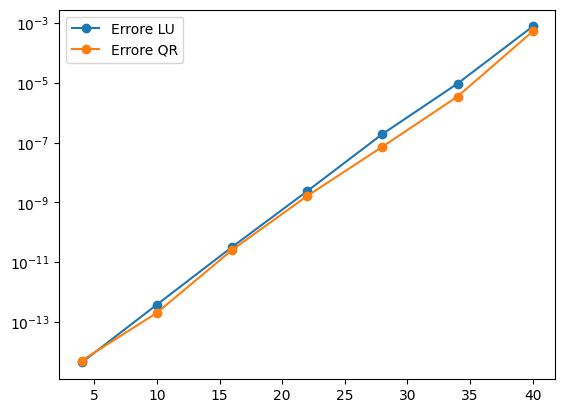

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

def Hankel(n):
    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A

valori_n = np.arange(4, 41, 6)
errori_lu = []
errori_qr = []
for n in valori_n:
    A = Hankel(n)
    x = np.ones((n, 1))
    b = A @ x 
    
    PT, L, U = sp.linalg.lu(A)
    P = PT.T.copy()
    pb = P@b
    x_lu, flag = Lsolve(L, pb)
    x_lu, flag = Usolve(U, x_lu)

    err_lu = np.linalg.norm(x - x_lu, 2) / np.linalg.norm(x, 2)
    errori_lu.append(err_lu)

    Q, R = sp.linalg.qr(A)
    x_qr = Q.T @ b
    x_qr, flag = Usolve(R, x_qr)
    
    err_qr = np.linalg.norm(x - x_qr, 2) / np.linalg.norm(x, 2)
    errori_qr.append(err_qr)

plt.semilogy(valori_n, errori_lu, "-o", label="Errore LU")
plt.semilogy(valori_n, errori_qr, "-o", label="Errore QR")
plt.legend()
plt.show()

## Esercizio 8

Ripetere l'esercizio precedente per risolvere il sistema lineare $Ax = b$
con $A$ e $b$ cos\`i  definiti:
$$
a^{(n)}_{i,j}=
\left \{
\begin{array}{ll}
1 & \hbox{se} \ i=j \ \hbox{o \, se} \ j=n,\\
-1 & \hbox{se} \ i>j,\\
0 & \hbox{altrimenti}
\end{array}
\right .
\qquad
b = A \cdot [1, ..., 1]^T,
$$
per $n = 48 : 2 : 58$ e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Che
cosa si osserva?

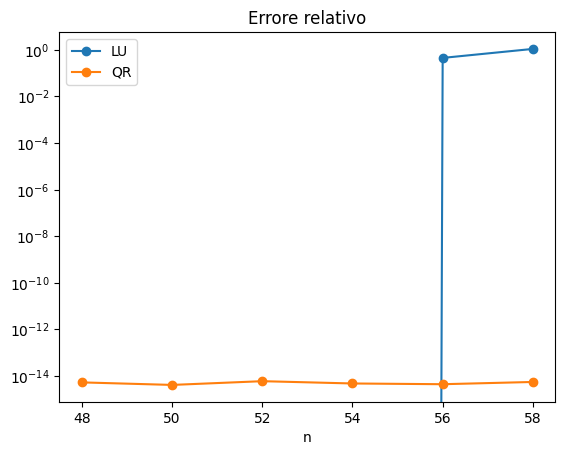

In [64]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def crea_A(n):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j or j == n - 1:
                A[i, j] = 1
            elif i > j:
                A[i, j] = -1
            else:
                A[i, j] = 0
    return A

valori_n = np.arange(48, 59, 2)
err_lu = []
err_qr = []
for n in valori_n:
    A = crea_A(n)
    x = np.ones((n, 1))
    b = A @ x

    # fattorizzazione LU
    PT, L, U = sp.linalg.lu(A)
    P = PT.T.copy()
    x_lu, flag = LUsolve(P, A, L, U, b)
    err_lu.append(np.linalg.norm(x - x_lu, 2) / np.linalg.norm(x, 2))

    # fattorizzazione QR
    Q, R = sp.linalg.qr(A)
    x_qr = Q.T @ b
    x_qr, flag = Usolve(R, x_qr)
    err_qr.append(np.linalg.norm(x - x_qr, 2) / np.linalg.norm(x, 2))

plt.title("Errore relativo")
plt.xlabel("n")
plt.yscale("log")
plt.plot(valori_n, err_lu, "-o", label="LU")
plt.plot(valori_n, err_qr, "-o", label="QR")
plt.legend()
plt.show()